![Alt text](./pic/gun_blood.jpg "a title")

# <b> US Mass Shooting (2018-2022) EDA and Visulization

## What is considered a mass shooting?
In the United States, there are several different, but common, definitions of mass shootings. The Congressional Research Service defines mass shootings, as multiple, firearm, homicide incidents, involving 4 or more victims at one or more locations close to one another. The FBI definition is essentially the same. Often there is a distinction made between private and public mass shootings (e.g., a school, place of worship, or a business establishment). Mass shootings undertaken by foreign terrorists are not included, no matter how many people die or where the shooting occurs.  

## Here, we are going to do EDA and visualization based on US mass shooting data between 2018-2022 to see what we could learn from it.  

### First for all, import libaries we need.

In [1]:
import pandas as pd 
import numpy as np
import chart_studio.plotly as py 
import cufflinks as cf
import seaborn as sns 
import plotly.express as px 
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

cf.go_offline()

import plotly.graph_objects as go
import sidetable

### Read data

In [2]:
df_all = pd.read_csv("./datasets/History_of_Mass_Shootings_in_the_USA.csv")

In [3]:
df_all.head()

Date         City       State  Dead  Injured  Total  \
0  2022-07-23       Renton  Washington     1        6      7   
1  2022-07-23      Chicago    Illinois     0        4      4   
2  2022-07-22    Maquoketa        Iowa     4        0      4   
3  2022-07-21  Los Angeles  California     0        4      4   
4  2022-07-19      Lincoln    Nebraska     0        4      4   

                                         Description  
0  Seven people were shot, one fatally, shortly a...  
1  A man got out of a black truck and opened fire...  
2  Iowa State Park shooting: A man shot and kille...  
3  Two men shot four people standing outside a CV...  
4  Four people, including a teenager, were shot i...

### Check missing value, there's no missing value, all good

In [5]:
df_all.stb.missing()

missing  total  percent
Date               0   2488      0.0
City               0   2488      0.0
State              0   2488      0.0
Dead               0   2488      0.0
Injured            0   2488      0.0
Total              0   2488      0.0
Description        0   2488      0.0

### Check if there's any miscaculated number. Well, we found four records.

In [199]:
df_all[df_all['Total']!=df_all['Dead']+df_all['Injured']]

Empty DataFrame
Columns: [City, State, Dead, Injured, Total, Description, year, month, day, isHoliday, isWeekend, weekday, state_code]
Index: []

### Let's check the description to see how to correct them

In [7]:
df_all.loc[594,'Description']

'After an argument escalated someone opened fire shortly after midnight killing one adult and wounding one adult and seven children.'

In [8]:
df_all.loc[992,'Description']

'Eight people were injured after a fight led to a shooting. Two other shootings, one of which was officer-involved, also occurred that night, though it is unknown if they were related to the original shooting.'

In [9]:
df_all.loc[2126,'Description']

'Police responded to a domestic dispute at a residence; upon arrival, the suspect fired shots at officers leading to a 12-hour hostage standoff. Four people were killed, and the suspect was taken into custody and later died.'

In [10]:
df_all.loc[2200,'Description']

'Three people were killed and one injured when a man began firing at 5 individuals at a bar following a pool game. The suspect was arrested.'

### According to descriptions above, we will correct the numbers respectively

In [11]:
df_all.loc[594,'Injured']=8
df_all.loc[594,'Total']=9

df_all.loc[992,'Injured']=8
df_all.loc[992,'Dead']=0

df_all.loc[2126,'Dead']=5

df_all.loc[2200,'Injured']=1
df_all.loc[2200,'Dead']=3
df_all.loc[2200,'Total']=4

### Check subtotal for all numerical data.  

In [200]:
df_all.stb.subtotal()

City        State    Dead  Injured    Total  \
2018-01-01 00:00:00     Huntsville      Alabama     1.0      3.0      4.0   
2018-01-04 00:00:00       Brinkley     Arkansas     1.0      3.0      4.0   
2018-01-05 00:00:00    Hattiesburg  Mississippi     0.0      6.0      6.0   
2018-01-07 00:00:00     Plantation      Florida     0.0      4.0      4.0   
2018-01-07 00:00:00  Union Springs      Alabama     1.0      5.0      6.0   
...                            ...          ...     ...      ...      ...   
2022-07-21 00:00:00    Los Angeles   California     0.0      4.0      4.0   
2022-07-22 00:00:00      Maquoketa         Iowa     4.0      0.0      4.0   
2022-07-23 00:00:00         Renton   Washington     1.0      6.0      7.0   
2022-07-23 00:00:00        Chicago     Illinois     0.0      4.0      4.0   
grand_total                    NaN          NaN  2579.0  10144.0  12723.0   

                                                           Description  year  \
2018-01-01 00:00:00  A 21-year-old was killed and three others were...  2018   
2018-01-04 00:00:00  A 33-year-old was killed and three others woun...  2018   
2018-01-05 00:00:00  Six people were wounded in a drive-by shooting...  2018   
2018-01-07 00:00:00  Four people were wounded while leaving a priva...  2018   
2018-01-07 00:00:00  A shooting on US Highway 29 led to the shootin...  2018   
...                                                                ...   ...   
2022-07-21 00:00:00  Two men shot four people standing outside a CV...  2022   
2022-07-22 00:00:00  Iowa State Park shooting: A man shot and kille...  2022   
2022-07-23 00:00:00  Seven people were shot, one fatally, shortly a...  2022   
2022-07-23 00:00:00  A man got out of a black truck and opened fire...  2022   
grand_total                                                        NaN   NaN   

                    month  day isHoliday isWeekend  weekday state_code  
2018-01-01 00:00:00    01   01      True     False      0.0         AL  
2018-01-04 00:00:00    01   04     False     False      3.0         AR  
2018-01-05 00:00:00    01   05     False     False      4.0         MS  
2018-01-07 00:00:00    01   07     False      True      6.0         FL  
2018-01-07 00:00:00    01   07     False      True      6.0         AL  
...                   ...  ...       ...       ...      ...        ...  
2022-07-21 00:00:00    07   21     False     False      3.0         CA  
2022-07-22 00:00:00    07   22     False     False      4.0         IA  
2022-07-23 00:00:00    07   23     False      True      5.0         WA  
2022-07-23 00:00:00    07   23     False      True      5.0         IL  
grand_total           NaN  NaN      81.0    1249.0   9443.0        NaN  

[2489 rows x 13 columns]

### Observations:  
1. From 2018.01.01 to 2022-07-23, there are totally 12,723 people wounded or died due to mass shooting, in which
2. there were 2,579 people died and 10,144 people wounded

### Extract year, month and day as news fields

In [13]:
df_all['year']=df_all['Date'].apply(lambda x:x.split('-')[0])
df_all['month']=df_all['Date'].apply(lambda x:x.split('-')[1])
df_all['day']=df_all['Date'].apply(lambda x:x.split('-')[2])

### Transfer "Date" to datetime and set it as new index

In [16]:
df_all['Date']=pd.to_datetime(df_all['Date'])
df_all.set_index('Date',inplace=True)

## Now, let's do visulization! My faverate part:)

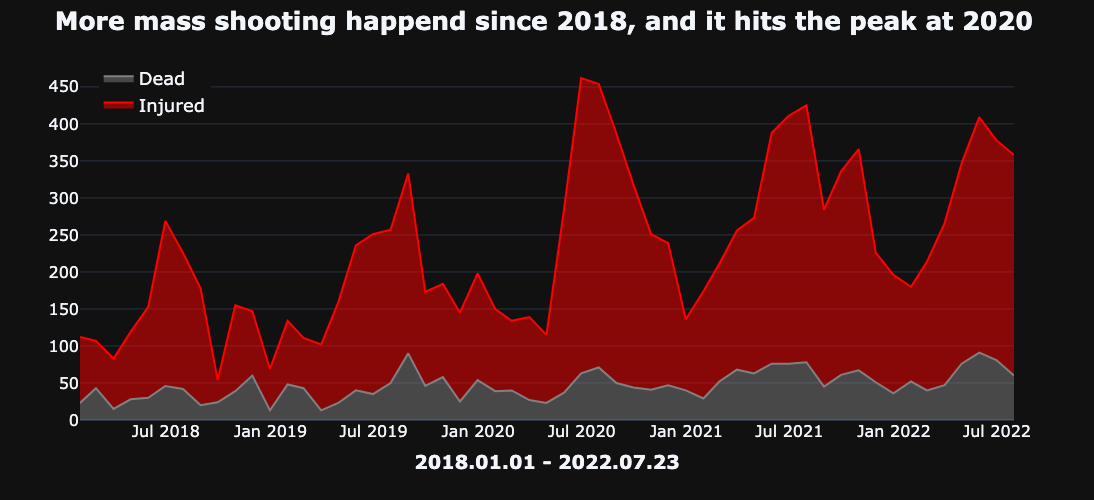

In [187]:
fig= px.area(df_all.resample('M').sum()[['Dead','Injured']],height=500,template="plotly_dark",
            color_discrete_sequence=['gray','red'])
fig.update_layout(xaxis=dict(title='<b>2018.01.01 - 2022.07.23',showgrid=False),font=dict(size=16),
                  yaxis=dict(title='',showgrid=True),
                  legend=dict(title='',font=dict(size=18),x=0.02,y=1),
                 title=dict(text = '<b>More mass shooting happend since 2018, and it hits the peak at 2020',
                           font=dict(size=25))
                 )

In [48]:
df_month =df_all.resample('M')[['Total']].sum()

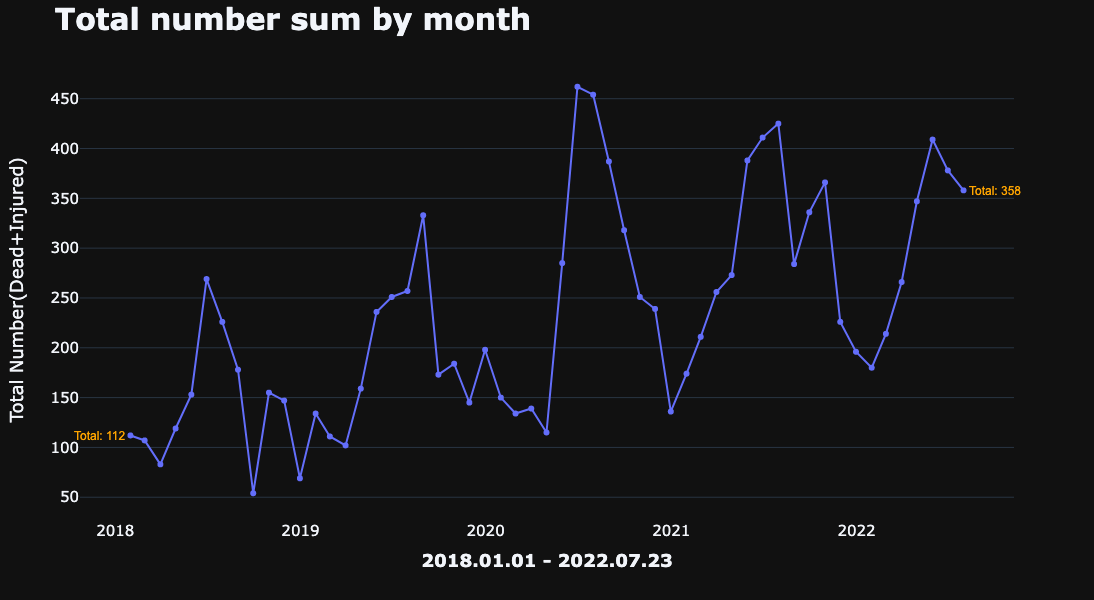

In [188]:
fig = px.line(df_month,template='plotly_dark',height=600,markers=True,hover_name=df_month.index)

fig.update_layout(title=dict(text='<b>Total number sum by month',font=dict(size=30)),xaxis=dict(title='<b>2018.01.01 - 2022.07.23',showgrid=False),font=dict(size=15),
                 yaxis=dict(title='Total Number(Dead+Injured)'),
                 showlegend=False)

annotations=[]

annotations.append(dict(xref='paper', x=0.05, y=df_month.loc['2018-01-31','Total'],
                              xanchor='right', yanchor='middle',
                              text='Total'+ ': {}'.format(df_month.loc['2018-01-31','Total']),
                              font=dict(family='Arial',
                                        size=12,color='orange'),
                              showarrow=False))

annotations.append(dict(xref='paper', x=0.95, y=df_month.loc['2022-07-31','Total'],
                              xanchor='left', yanchor='middle',
                              text='Total'+ ': {}'.format(df_month.loc['2022-07-31','Total']),
                              font=dict(family='Arial',
                                        size=12,color='orange'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig

In [17]:
df_all.groupby('State').sum().sort_values(['Total','Dead','Injured'],ascending=False).head(10)

Dead  Injured  Total
State                             
Illinois       184     1174   1358
Texas          292      765   1057
California     251      753   1004
Florida        149      530    679
Pennsylvania    91      488    579
Louisiana       91      487    578
New York        67      509    576
Ohio            91      388    479
Georgia         82      345    427
Michigan        94      298    392

In [65]:
df_all.groupby('State')[['Total']].count().sort_values(by='Total',ascending=False).head(10)

Total
State              
Illinois        265
California      191
Texas           187
Florida         129
Pennsylvania    118
New York        116
Louisiana       115
Ohio             89
Georgia          87
Michigan         85

In [96]:
state_index = df_all.groupby('State')[['Total']].sum().sort_values(by='Total',ascending=True).tail(10).index

In [184]:
title_en ='<b>Total number by State - Top 10'

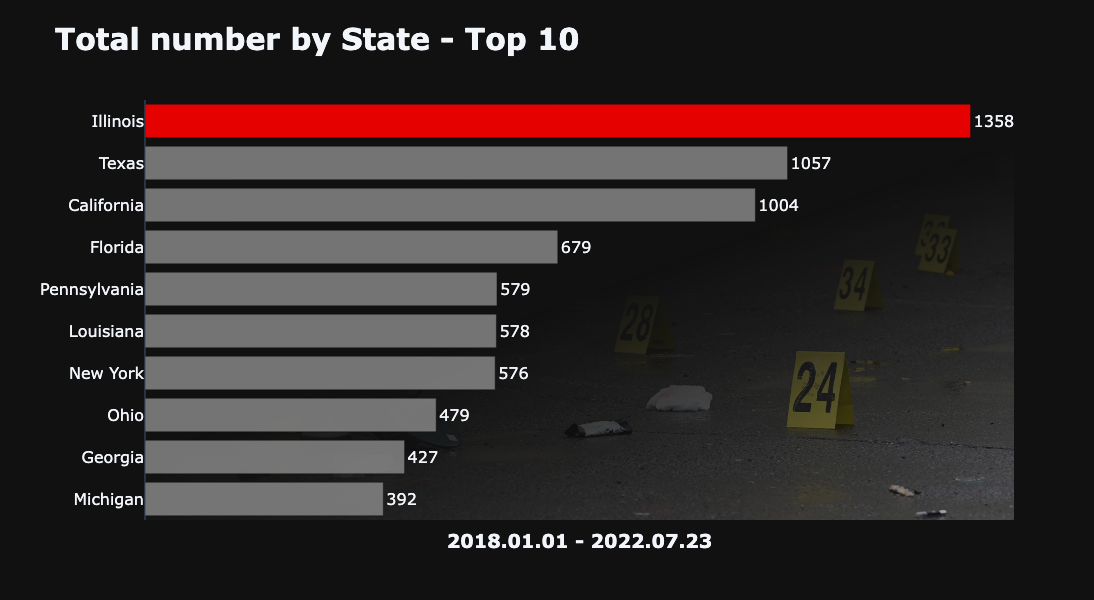

In [185]:
fig = px.bar(df_all.groupby('State')[['State','Total']].sum().sort_values(by='Total',ascending=True).tail(10),
             title=title_en,template='plotly_dark',color=state_index,
            text_auto=True,orientation='h',height=600,opacity=0.9,color_discrete_sequence=["gray","gray","gray","gray","gray","gray","gray","gray","gray","red"])
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False, xaxis=dict(title='<b>2018.01.01 - 2022.07.23',showgrid=False,showticklabels=False),font=dict(size=16),yaxis=dict(title=''),
                 title=dict(font=dict(size=30)))

import base64
#set a local image as a background
image_filename = './pic/mass_shooting-1.png'
bg_image = base64.b64encode(open(image_filename, 'rb').read())

fig.update_layout(
                images= [dict(
                    source='data:image/png;base64,{}'.format(bg_image.decode()),
                    xref="paper", yref="paper",
                    x=0, y=1,
                    sizex=1, sizey=1,
                    xanchor="left",
                    yanchor="top",
                    sizing="stretch",
                    layer="below")])

fig 

In [149]:
city_index = df_all.groupby('City')[['Total']].sum().sort_values(by='Total',ascending=True).tail(10).index

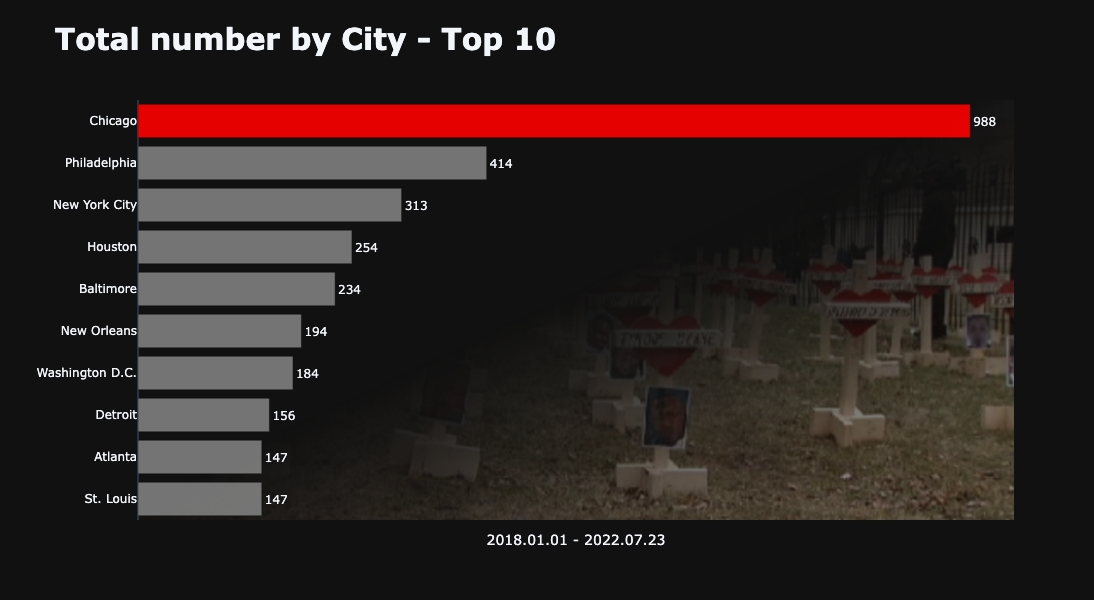

In [189]:
fig = px.bar(df_all.groupby('City')[['Total']].sum().sort_values(by='Total',ascending=True).tail(10),
             title='<b>Total number by City - Top 10',template='plotly_dark',color=city_index,
            text_auto=True,orientation='h',height=600,opacity=0.9,color_discrete_sequence=["gray","gray","gray","gray","gray","gray","gray","gray","gray","red"])
fig.update_traces(textposition='outside')
image_filename = './pic/mass-shooting-2.png'
bg_image = base64.b64encode(open(image_filename, 'rb').read())

fig.update_layout(
                images= [dict(
                    source='data:image/png;base64,{}'.format(bg_image.decode()),
                    xref="paper", yref="paper",
                    x=0, y=1,
                    sizex=1, sizey=1,
                    xanchor="left",
                    yanchor="top",
                    sizing="stretch",
                    opacity=0.6,
                    layer="below")])

fig.update_layout(showlegend=False, xaxis=dict(title='2018.01.01 - 2022.07.23',showgrid=False,showticklabels=False),yaxis=dict(title=''),
                 title=dict(font=dict(size=30)))
fig 

### Let's do check on how's mass shooting connecting to Holiday ans Weekend

In [112]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [114]:
def judgeHolidaysInRange(from_date, to_date):
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(from_date, to_date)
    duedays = pd.date_range(from_date, to_date)
    df = pd.DataFrame()
    df['date'] = duedays
    df['isHoliday'] = duedays.isin(holidays)
    return df 

In [115]:
df_od= judgeHolidaysInRange('2018-01-01','2022-07-23')

In [116]:
df_od.shape

(1665, 2)

In [117]:
df_od.head()

date  isHoliday
0 2018-01-01       True
1 2018-01-02      False
2 2018-01-03      False
3 2018-01-04      False
4 2018-01-05      False

In [118]:
df_od.set_index('date',inplace=True)

In [119]:
df_all=df_all.join(df_od)

In [120]:
df_all.head()

City        State  Dead  Injured  Total  \
2018-01-01     Huntsville      Alabama     1        3      4   
2018-01-04       Brinkley     Arkansas     1        3      4   
2018-01-05    Hattiesburg  Mississippi     0        6      6   
2018-01-07     Plantation      Florida     0        4      4   
2018-01-07  Union Springs      Alabama     1        5      6   

                                                  Description  year month day  \
2018-01-01  A 21-year-old was killed and three others were...  2018    01  01   
2018-01-04  A 33-year-old was killed and three others woun...  2018    01  04   
2018-01-05  Six people were wounded in a drive-by shooting...  2018    01  05   
2018-01-07  Four people were wounded while leaving a priva...  2018    01  07   
2018-01-07  A shooting on US Highway 29 led to the shootin...  2018    01  07   

            isHoliday  
2018-01-01       True  
2018-01-04      False  
2018-01-05      False  
2018-01-07      False  
2018-01-07      False

### Add a column to indicate that whether it's weekend or not

In [122]:
df_all['isWeekend']=df_all.index.day_of_week>4

### Now we have two new fields

In [123]:
df_all.head()

City        State  Dead  Injured  Total  \
2018-01-01     Huntsville      Alabama     1        3      4   
2018-01-04       Brinkley     Arkansas     1        3      4   
2018-01-05    Hattiesburg  Mississippi     0        6      6   
2018-01-07     Plantation      Florida     0        4      4   
2018-01-07  Union Springs      Alabama     1        5      6   

                                                  Description  year month day  \
2018-01-01  A 21-year-old was killed and three others were...  2018    01  01   
2018-01-04  A 33-year-old was killed and three others woun...  2018    01  04   
2018-01-05  Six people were wounded in a drive-by shooting...  2018    01  05   
2018-01-07  Four people were wounded while leaving a priva...  2018    01  07   
2018-01-07  A shooting on US Highway 29 led to the shootin...  2018    01  07   

            isHoliday  isWeekend  
2018-01-01       True      False  
2018-01-04      False      False  
2018-01-05      False      False  
2018-01-07      False       True  
2018-01-07      False       True

### Check subtotal again, we can observe that there are much more cases happended during weekened than in holiday

In [125]:
df_all.groupby(['month','day']).sum().stb.subtotal()

Dead  Injured  Total  isHoliday  isWeekend
month       day                                                      
01          01               17       72     89         11          8
            02                5       11     16          0          2
            03                8       26     34          0          6
            04               10       29     39          0          1
            05                0       15     15          0          1
...                         ...      ...    ...        ...        ...
12          29                5       16     21          0          5
            30                2        8     10          0          0
            31                8       22     30          3          0
            12 - subtotal   143      456    599         11         54
grand_total                2579    10144  12723         81       1249

[376 rows x 5 columns]

### Let use heatmap to get some insight

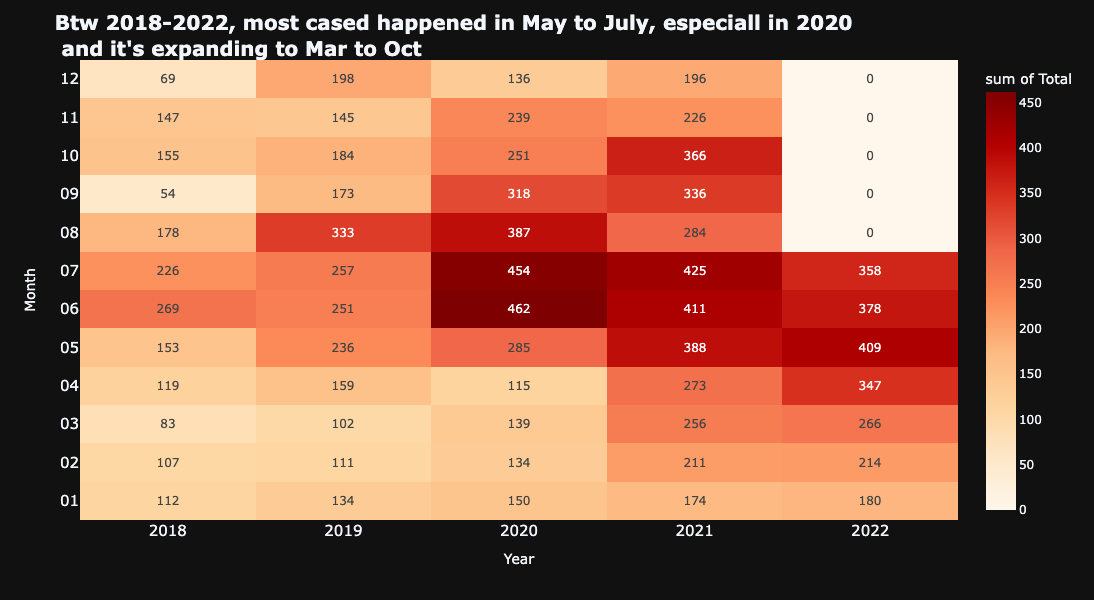

In [197]:
fig = px.density_heatmap(df_all.sort_values(['month','year']),
                         x='year',y='month',z='Total',template='plotly_dark',
                         color_continuous_scale='OrRd',text_auto=True,
                        height=600)
fig.update_layout(xaxis=dict(title='Year',tickfont=dict(size=15)), 
                  yaxis=dict(title='Month',tickfont=dict(size=15)),
                  title=dict(text="<b>Btw 2018-2022, most cased happened in May to July, especiall in 2020<br> and it's expanding to Mar to Oct",font=dict(size=20)))
fig

In [126]:
weekday=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

In [128]:
def get_weekday(date):
    wd = weekday[date.weekday()]
    return wd

In [129]:
df_all['weekday']=df_all.index.weekday

In [130]:
df_all.head() 

City        State  Dead  Injured  Total  \
2018-01-01     Huntsville      Alabama     1        3      4   
2018-01-04       Brinkley     Arkansas     1        3      4   
2018-01-05    Hattiesburg  Mississippi     0        6      6   
2018-01-07     Plantation      Florida     0        4      4   
2018-01-07  Union Springs      Alabama     1        5      6   

                                                  Description  year month day  \
2018-01-01  A 21-year-old was killed and three others were...  2018    01  01   
2018-01-04  A 33-year-old was killed and three others woun...  2018    01  04   
2018-01-05  Six people were wounded in a drive-by shooting...  2018    01  05   
2018-01-07  Four people were wounded while leaving a priva...  2018    01  07   
2018-01-07  A shooting on US Highway 29 led to the shootin...  2018    01  07   

            isHoliday  isWeekend  weekday  
2018-01-01       True      False        0  
2018-01-04      False      False        3  
2018-01-05      False      False        4  
2018-01-07      False       True        6  
2018-01-07      False       True        6

In [132]:
weekday_en=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
# weekday_cn=['周一','周二','周三','周四','周五','周六','周日']

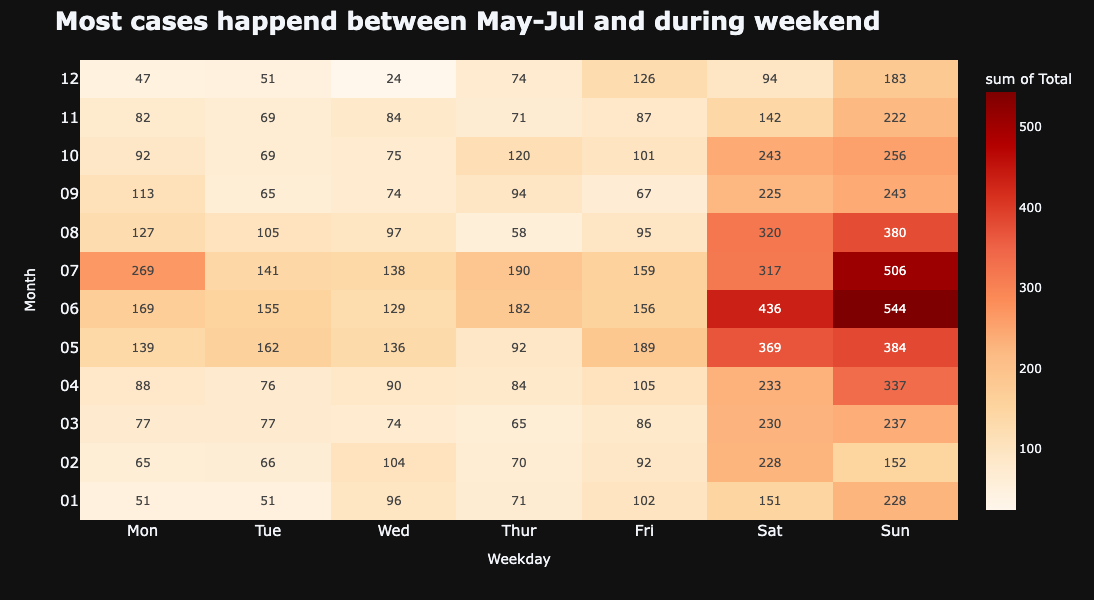

In [157]:
fig = px.density_heatmap(df_all,x='weekday',y='month',z='Total',
                         color_continuous_scale='OrRd',text_auto=True,
                         height=600,
                        template='plotly_dark')
fig.update_layout(xaxis=dict(title='Weekday', tickfont=dict(size=15),tickmode='array',ticktext=weekday_en,tickvals=[0,1,2,3,4,5,6]),
                 yaxis=dict(title='Month',tickfont=dict(size=15)),
                 legend_title="Legend Title",title=dict(text='<b>Most cases happend between May-Jul and during weekend',font=dict(size=25)))
fig

### Let's plot data to map to get some straitforward view

In [198]:
state_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    'United States Virgin Isls':"VI",
    "Washington D.C.": "DC",
    "Rhode Isl": "RI",
    "Maryl": "MD",
    
}

In [135]:
df_all['state_code'] = df_all.State.replace(state_code)
df_all.head(5)

City        State  Dead  Injured  Total  \
2018-01-01     Huntsville      Alabama     1        3      4   
2018-01-04       Brinkley     Arkansas     1        3      4   
2018-01-05    Hattiesburg  Mississippi     0        6      6   
2018-01-07     Plantation      Florida     0        4      4   
2018-01-07  Union Springs      Alabama     1        5      6   

                                                  Description  year month day  \
2018-01-01  A 21-year-old was killed and three others were...  2018    01  01   
2018-01-04  A 33-year-old was killed and three others woun...  2018    01  04   
2018-01-05  Six people were wounded in a drive-by shooting...  2018    01  05   
2018-01-07  Four people were wounded while leaving a priva...  2018    01  07   
2018-01-07  A shooting on US Highway 29 led to the shootin...  2018    01  07   

            isHoliday  isWeekend  weekday state_code  
2018-01-01       True      False        0         AL  
2018-01-04      False      False        3         AR  
2018-01-05      False      False        4         MS  
2018-01-07      False       True        6         FL  
2018-01-07      False       True        6         AL

In [136]:
df_gs=df_all.groupby('State')[['Total']].sum()

In [137]:
df_gs.reset_index(inplace=True)

In [138]:
df_gs['state_code'] = df_gs.State.replace(state_code)

In [139]:
df_gs

State  Total state_code
0                     Alabama    333         AL
1                      Alaska     18         AK
2                     Arizona    155         AZ
3                    Arkansas    171         AR
4                  California   1004         CA
5                    Colorado    227         CO
6                 Connecticut     70         CT
7                    Delaware     58         DE
8        District of Columbia     21         DC
9                     Florida    679         FL
10                    Georgia    427         GA
11                     Hawaii      8         HI
12                      Idaho     12         ID
13                   Illinois   1358         IL
14                    Indiana    270         IN
15                       Iowa     86         IA
16                     Kansas     60         KS
17                   Kentucky    159         KY
18                  Louisiana    578         LA
19                      Maine      4         ME
20                      Maryl    359         MD
21              Massachusetts     88         MA
22                   Michigan    392         MI
23                  Minnesota    151         MN
24                Mississippi    244         MS
25                   Missouri    373         MO
26                    Montana      9         MT
27                   Nebraska     47         NE
28                     Nevada    109         NV
29              New Hampshire      4         NH
30                 New Jersey    284         NJ
31                 New Mexico     65         NM
32                   New York    576         NY
33             North Carolina    388         NC
34                       Ohio    479         OH
35                   Oklahoma     90         OK
36                     Oregon     82         OR
37               Pennsylvania    579         PA
38                     Peoria     13     Peoria
39                Puerto Rico     16         PR
40                  Rhode Isl     18         RI
41                  Santa Ana      5  Santa Ana
42             South Carolina    387         SC
43               South Dakota      9         SD
44                  Tennessee    362         TN
45                      Texas   1057         TX
46  United States Virgin Isls     27         VI
47                       Utah     18         UT
48                   Virginia    263         VA
49                 Washington    132         WA
50            Washington D.C.    184         DC
51              West Virginia     25         WV
52                  Wisconsin    186         WI
53                    Wyoming      4         WY

### Record 38 and 41 are cities not stats, so I will remove these two

In [140]:
df_gs.drop([38,41],inplace=True)

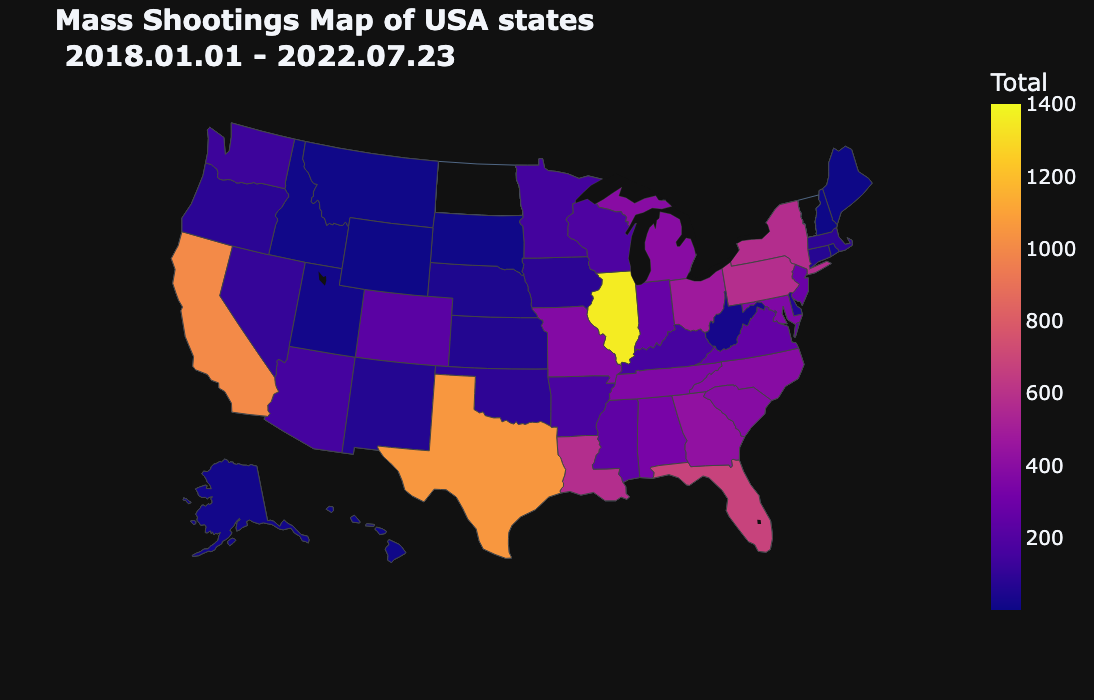

In [170]:
fig = px.choropleth(df_gs,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total',
                    range_color = [1,1400],
                    template = 'plotly_dark',
                    hover_name='State',
                    height=700
                   )

fig.update_layout(
    title_text = '<b>Mass Shootings Map of USA states<br> 2018.01.01 - 2022.07.23',font_size=20
                    )

fig.show()